# **Library dan Load Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import re as reg
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = ("/content/drive/MyDrive/Project Portofolio/Sentiment Analysis VEO3/dataset label.xlsx")
df = pd.read_excel(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,sentiment,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7511926079461196562,1749006592,2025-06-04T03:09:52.000Z,78,https://www.tiktok.com/@tarralikesmakeup/video...,False,False,NaN,0.0,https://www.tiktok.com/@tarralikesmakeup/video...,I hate AI.,n,7452861873278288904,dbybie,https://www.tiktok.com/@tarralikesmakeup/video...
1,https://p16-common-sign-va.tiktokcdn-us.com/to...,7511954061538181895,1749013107,2025-06-04T04:58:27.000Z,2,https://www.tiktok.com/@tarralikesmakeup/video...,False,False,NaN,4.0,https://www.tiktok.com/@tarralikesmakeup/video...,its ok tho,p,6884865504617448449,user0612121212,https://www.tiktok.com/@tarralikesmakeup/video...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7511954329764102928,1749013176,2025-06-04T04:59:36.000Z,15,https://www.tiktok.com/@tarralikesmakeup/video...,False,False,7.511954e+18,NaN,https://www.tiktok.com/@tarralikesmakeup/video...,uh..,n,7278598571224957958,elinnlinne,https://www.tiktok.com/@tarralikesmakeup/video...
3,https://p16-common-sign-va.tiktokcdn-us.com/to...,7511871009621508880,1748993795,2025-06-03T23:36:35.000Z,17,https://www.tiktok.com/@tarralikesmakeup/video...,False,False,NaN,0.0,https://www.tiktok.com/@tarralikesmakeup/video...,"if your job were easly replacable with AI, it ...",a,6799146445066028033,hivvacc1ne,https://www.tiktok.com/@tarralikesmakeup/video...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7512001465257181960,1749024146,2025-06-04T08:02:26.000Z,0,https://www.tiktok.com/@tarralikesmakeup/video...,False,False,NaN,0.0,https://www.tiktok.com/@tarralikesmakeup/video...,"ai should've been banned in Indonesia loll, li...",n,7357269326078936069,mairalalalaw,https://www.tiktok.com/@tarralikesmakeup/video...


# **Exploratory Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avatarThumbnail    378 non-null    object 
 1   cid                378 non-null    int64  
 2   createTime         378 non-null    int64  
 3   createTimeISO      378 non-null    object 
 4   diggCount          378 non-null    int64  
 5   input              378 non-null    object 
 6   likedByAuthor      378 non-null    bool   
 7   pinnedByAuthor     378 non-null    bool   
 8   repliesToId        14 non-null     float64
 9   replyCommentTotal  364 non-null    float64
 10  submittedVideoUrl  378 non-null    object 
 11  text               367 non-null    object 
 12  sentiment          362 non-null    object 
 13  uid                378 non-null    int64  
 14  uniqueId           378 non-null    object 
 15  videoWebUrl        378 non-null    object 
dtypes: bool(2), float64(2), in

In [ ]:
df.isnull().sum()

,0
avatarThumbnail,0
cid,0
createTime,0
createTimeISO,0
diggCount,0
input,0
likedByAuthor,0
pinnedByAuthor,0
repliesToId,364
replyCommentTotal,14


In [ ]:
dt = df[["text", "sentiment"]]
dt.head()

,text,sentiment
0,I hate AI.,n
1,its ok tho,p
2,uh..,n
3,"if your job were easly replacable with AI, it ...",a
4,"ai should've been banned in Indonesia loll, li...",n


In [ ]:
dt.loc[:, "sentiment"] = dt["sentiment"].replace({
    "p" : "positif",
    "n" : "negatif",
    "a" : "netral"
})

In [ ]:
dt.head()

,text,sentiment
0,I hate AI.,negatif
1,its ok tho,positif
2,uh..,negatif
3,"if your job were easly replacable with AI, it ...",netral
4,"ai should've been banned in Indonesia loll, li...",negatif


In [ ]:
dt.isnull().sum()

,0
text,11
sentiment,16


In [ ]:
dt = dt.dropna()

In [ ]:
dt.isnull().sum()

,0
text,0
sentiment,0


In [ ]:
jumlah = dt["sentiment"].value_counts()
jumlah

,count
sentiment,
negatif,170
netral,126
positif,66


# **Pre Processing Data**

In [ ]:
#Bersihkan data
stopword=set(stopwords.words('indonesian'))

#stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Hapus stopwords
    text = [word for word in text.split() if word not in stopword]

    # Stemming
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Terapkan ke kolom
dt.loc[:, 'text'] = dt["text"].apply(clean)

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(dt["text"])
y = dt["sentiment"]

In [ ]:
#Encoding kolom sentiment
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
#Resampling dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x, y_encoded)

In [ ]:
import pandas as pd

y_resampled_series = pd.Series(y_resampled)
print("Distribusi label setelah SMOTE:")
print(y_resampled_series.value_counts())


Distribusi label setelah SMOTE:
0    170
2    170
1    170
Name: count, dtype: int64


# **Pemodelan**

In [ ]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42)

## **Model SVM**

In [ ]:
#Pemodelan dengan SVM
from sklearn import svm
model = svm.SVC(kernel = 'linear')

model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#Evaluasi model
from sklearn.metrics import classification_report

pred = model.predict(x_test)
print(classification_report(y_test, pred, target_names=le.classes_))

              precision    recall  f1-score   support

     negatif       0.77      0.66      0.71        35
      netral       0.54      0.70      0.61        27
     positif       0.92      0.85      0.88        40

    accuracy                           0.75       102
   macro avg       0.74      0.74      0.73       102
weighted avg       0.77      0.75      0.75       102



In [ ]:
#Visualisasi
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(y_test, pred)
print(cf_metrix)

[[23 11  1]
 [ 6 19  2]
 [ 1  5 34]]


<Axes: >

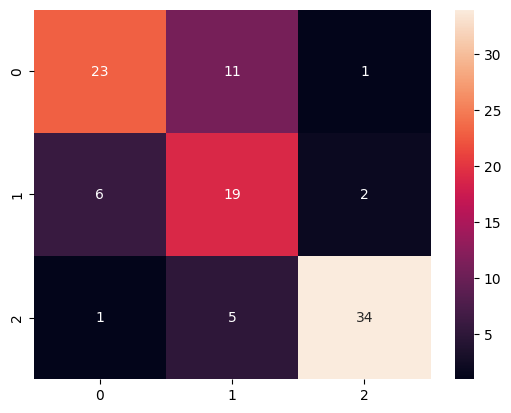

In [ ]:
import seaborn as sns
sns.heatmap(cf_metrix, annot = True)

## **Model Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb= MultinomialNB()
model_nb.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
#Evaluasi model
from sklearn.metrics import classification_report

pred1 = model_nb.predict(x_test)
print(classification_report(y_test, pred1, target_names=le.classes_))

              precision    recall  f1-score   support

     negatif       0.89      0.69      0.77        35
      netral       0.58      0.67      0.62        27
     positif       0.82      0.90      0.86        40

    accuracy                           0.76       102
   macro avg       0.76      0.75      0.75       102
weighted avg       0.78      0.76      0.77       102



<Axes: >

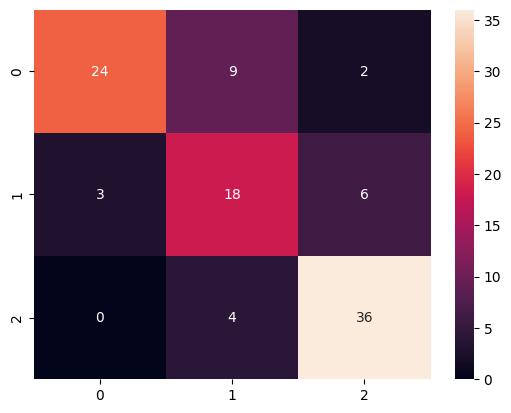

In [ ]:
#Visualisasi
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(y_test, pred1)

import seaborn as sns
sns.heatmap(cf_metrix, annot = True)

## **Model XGB**

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:03:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Evaluasi model
from sklearn.metrics import classification_report

y_pred = model_xgb.predict(x_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

     negatif       0.71      0.63      0.67        35
      netral       0.53      0.67      0.59        27
     positif       0.84      0.78      0.81        40

    accuracy                           0.70       102
   macro avg       0.69      0.69      0.69       102
weighted avg       0.71      0.70      0.70       102



<Axes: >

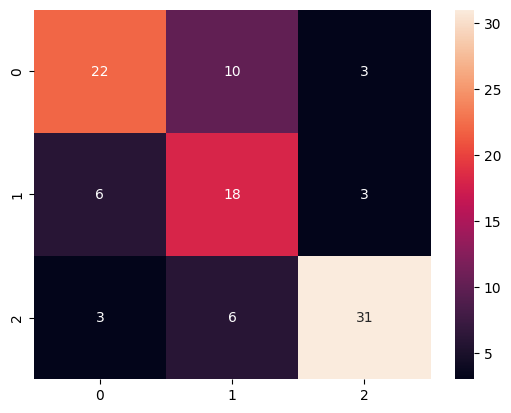

In [ ]:
#Visualisasi
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cf_metrix, annot = True)

## **Model Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_r = RandomForestClassifier(n_estimators=100, random_state=42)
model_r.fit(x_train, y_train)
y_pred1 = model_r.predict(x_test)

In [ ]:
#Evaluasi model
from sklearn.metrics import classification_report

y_pred1 = model_r.predict(x_test)
print(classification_report(y_test, y_pred1, target_names=le.classes_))

              precision    recall  f1-score   support

     negatif       0.67      0.57      0.62        35
      netral       0.46      0.63      0.53        27
     positif       0.89      0.78      0.83        40

    accuracy                           0.67       102
   macro avg       0.67      0.66      0.66       102
weighted avg       0.70      0.67      0.68       102



<Axes: >

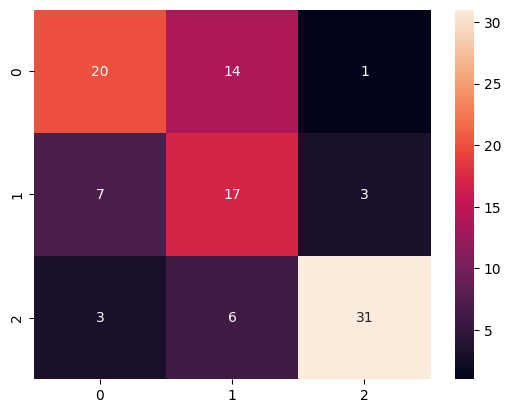

In [ ]:
#Visualisasi
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(y_test, y_pred1)

import seaborn as sns
sns.heatmap(cf_metrix, annot = True)

## **Model Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_l = LogisticRegression()
model_l.fit(x_train, y_train)
y_pred2 = model_l.predict(x_test)

In [ ]:
#Evaluasi model
from sklearn.metrics import classification_report

y_pred2 = model_l.predict(x_test)
print(classification_report(y_test, y_pred2, target_names=le.classes_))

              precision    recall  f1-score   support

     negatif       0.82      0.66      0.73        35
      netral       0.53      0.74      0.62        27
     positif       0.89      0.80      0.84        40

    accuracy                           0.74       102
   macro avg       0.75      0.73      0.73       102
weighted avg       0.77      0.74      0.74       102



<Axes: >

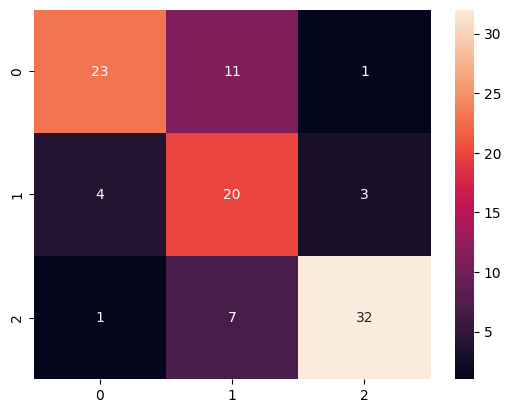

In [ ]:
#Visualisasi
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(y_test, y_pred2)

import seaborn as sns
sns.heatmap(cf_metrix, annot = True)

# **Prediksi Data Baru**

## **Load Data I**

In [ ]:
file_path = ("/content/drive/MyDrive/Project Portofolio/Sentiment Analysis VEO3/komen iklan top coffe.xlsx")
test = pd.read_excel(file_path)
test

,avatarThumbnail,cid,createTime,createTimeISO,detailedMentions/0/nickName,detailedMentions/0/profileUrl,detailedMentions/0/secUid,detailedMentions/0/userId,detailedMentions/1/nickName,detailedMentions/1/profileUrl,...,mentions/0,mentions/1,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-va.tiktokcdn-us.com/to...,7514658389641659144,1749642754,2025-06-11T11:52:34.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,megan,7403570021601723393,novex77777,https://www.tiktok.com/@topcoffeeofficial/vide...
1,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7514447560422195976,1749593677,2025-06-10T22:14:37.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,NICE,6813287297011549185,redchermr,https://www.tiktok.com/@topcoffeeofficial/vide...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7514307811712926482,1749561131,2025-06-10T13:12:11.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,prom,7477187069912105985,itanyxl,https://www.tiktok.com/@topcoffeeofficial/vide...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7513935571606717192,1749474461,2025-06-09T13:07:41.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,ohhh,7180516289373471745,raka_7879,https://www.tiktok.com/@topcoffeeofficial/vide...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7514626262956262162,1749635447,2025-06-11T09:50:47.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,move on double,7486439348469040144,miraarmelia752,https://www.tiktok.com/@topcoffeeofficial/vide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7514181025510228744,1749531609,2025-06-10T05:00:09.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,guyys kebayang GK sih disalah ai disalah gunak...,6981210790351520770,agias463,https://www.tiktok.com/@topcoffeeofficial/vide...
307,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7513854219687183120,1749455522,2025-06-09T07:52:02.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,ai ngomong nya ngebet,7478668564481704961,dinii7599,https://www.tiktok.com/@topcoffeeofficial/vide...
308,https://p16-common-sign-va.tiktokcdn-us.com/to...,7514286264038490898,1749556114,2025-06-10T11:48:34.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,aku sudah tidak percaya lagi denganmu,7208622411611472922,elbeatswararecord,https://www.tiktok.com/@topcoffeeofficial/vide...
309,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7513851904138461960,1749454983,2025-06-09T07:43:03.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@topcoffeeofficial/vide...,ke slebeww,7468242866147034130,zashazac,https://www.tiktok.com/@topcoffeeofficial/vide...


In [ ]:
dn = test[["text"]]
dn.head()

,text
0,megan
1,NICE
2,prom
3,ohhh
4,move on double


In [ ]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    281 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB


In [ ]:
dn.isnull().sum()

,0
text,30


In [ ]:
dn = dn.dropna(subset=['text'])

In [ ]:
dn.isnull().sum()

,0
text,0


## **Pre Processing Data**

In [ ]:
#Bersihkan data
stopword=set(stopwords.words('indonesian'))

#stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Hapus stopwords
    text = [word for word in text.split() if word not in stopword]

    # Stemming
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Terapkan ke kolom
dn["text"] = dn["text"].apply(clean)

In [ ]:
singkatan = {'dll', 'dsb', 'dr', 'stlh', 'blm', 'krn', 'tlg', 'tp', 'yg', 'krn', 'gmw', 'jg', 'gk', 'yh', 'ajh', 'wapresny',
             'diualng', 'bgt', 'worksssss', 'tpi', 'bjir', 'jirrr', 'prchaan', 'bbrp', 'klo', 'mrk', 'pdhal', 'wktu',
             'woakwow', 'wkwkwk', 'gk', 'ush', 'gue', 'ga', 'ngga', 'tp', 'ko', 'pa', 'gua', 'gak', 'jgn', 'nya', 'ya', 'si',
             'gw', 'jd', 'org', 'deh', 'aja', 'tuh', 'lgsg', 'knp', 'ap', 'tu', 'kek', 'loll', 'chek', 'nemu', 'slebeww', 'ohhh',
             'guyys', 'bgt', 'kk', 'ngk', 'jir', 'woy', 'loh', 'ea', 'oh', 'knal','kerennn', 'dijadiin', 'kmrn', 'slsai', 'hahaha',
             'ni', 'minn', 'ttep', 'jirr', 'sa', 'ge'}
dn.loc[:, 'text'] = dn['text'].apply(lambda kalimat: ' '.join([kata for kata in kalimat.split() if kata not in singkatan]))

In [ ]:
dn['text'] = dn['text'].fillna('').astype(str)

print('HASIL TOKENISASI')
token = dn['text'].apply(lambda x: x.split())
print(token)

HASIL TOKENISASI
0                                          [megan]
1                                           [nice]
2                                           [prom]
3                                               []
4                               [move, on, double]
                          ...                     
306    [bayang, sih, salah, ai, salah, film, dwsa]
307                          [ai, ngomong, ngebet]
308                              [percaya, dengan]
309                                             []
310                                      [ngomong]
Name: text, Length: 281, dtype: object


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#menghapus kata tidak bermakna seperti a, i, and, dan sebagainya
stop_words = set(stopwords.words('english'))
token = token.apply(lambda x: [word for word in x if word not in stop_words])
token

,text
0,[megan]
1,[nice]
2,[prom]
3,[]
4,"[move, double]"
...,...
306,"[bayang, sih, salah, ai, salah, film, dwsa]"
307,"[ai, ngomong, ngebet]"
308,"[percaya, dengan]"
309,[]


In [ ]:
#menghapus kata tidak bermakna seperti a, i, and, dan sebagainya
stop_words = set(stopwords.words('indonesian'))
token = token.apply(lambda x: [word for word in x if word not in stop_words])
token

,text
0,[megan]
1,[nice]
2,[prom]
3,[]
4,"[move, double]"
...,...
306,"[bayang, sih, salah, ai, salah, film, dwsa]"
307,"[ai, ngomong, ngebet]"
308,[percaya]
309,[]


In [ ]:
dn.isnull().sum()

,0
text,0


In [ ]:
# # Memisahkan setiap kata dalam setiap dokumen teks
# print('HASIL TOKENISASI')
# hasil_tokenisasi = dn['text'].apply(lambda x: x.split())
# print(hasil_tokenisasi)

In [ ]:
x_new = vectorizer.transform(dn['text'])  # hasil bentuk sparse matrix

## **Prediksi**

In [ ]:
y_pred = model_nb.predict(x_new)
y_pred_labels = le.inverse_transform(y_pred)

In [ ]:
dn['predicted_sentiment'] = y_pred_labels

In [ ]:
dn

,text,predicted_sentiment
0,megan,netral
1,nice,netral
2,prom,netral
3,,netral
4,move on double,positif
...,...,...
306,bayang sih salah ai salah film dwsa,netral
307,ai ngomong ngebet,negatif
308,percaya dengan,negatif
309,,netral


## **Visualisasi**

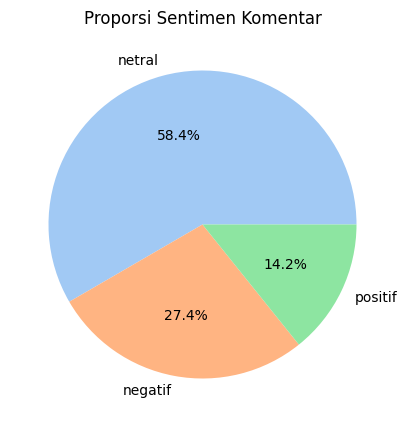

In [ ]:
sentimen_counts = dn['predicted_sentiment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proporsi Sentimen Komentar')
plt.show()

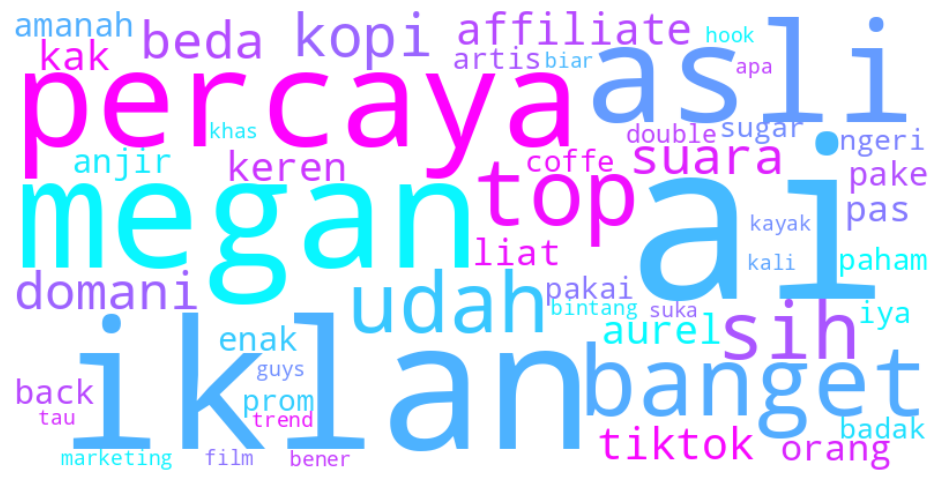

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Pastikan kolom "Hashtags" bertipe string
dn["text"] = dn["text"].astype(str)

# Pisahkan setiap hashtag menjadi daftar individu
hashtags_list = dn["text"].str.split().explode()

# Hitung frekuensi hashtag
hashtag_counts = Counter(hashtags_list)

# Buat Word Cloud berdasarkan frekuensi hashtag
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="cool",
                      prefer_horizontal=1, max_words=50).generate_from_frequencies(hashtag_counts)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hilangkan sumbu
plt.show()

In [ ]:
# WordCloud dari hasil prediksi model
positif_texts = dn[dn['predicted_sentiment'] == 'positif']['text']
negatif_texts = dn[dn['predicted_sentiment'] == 'negatif']['text']
netral_texts  = dn[dn['predicted_sentiment'] == 'netral']['text']

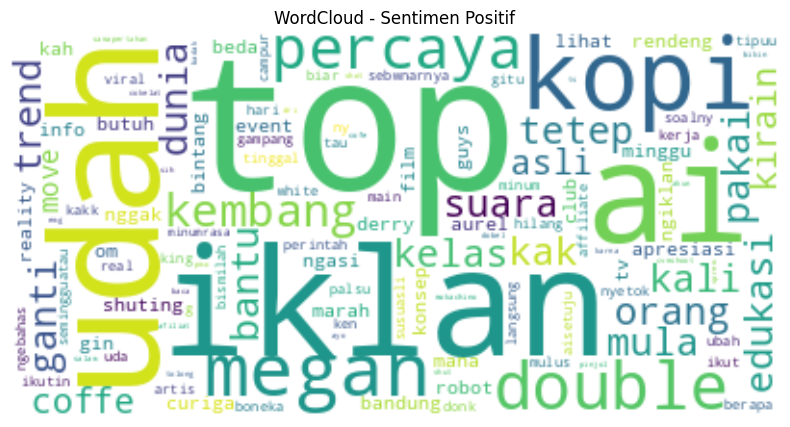

In [ ]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positif
positif = ' '.join(positif_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Positif")
plt.show()

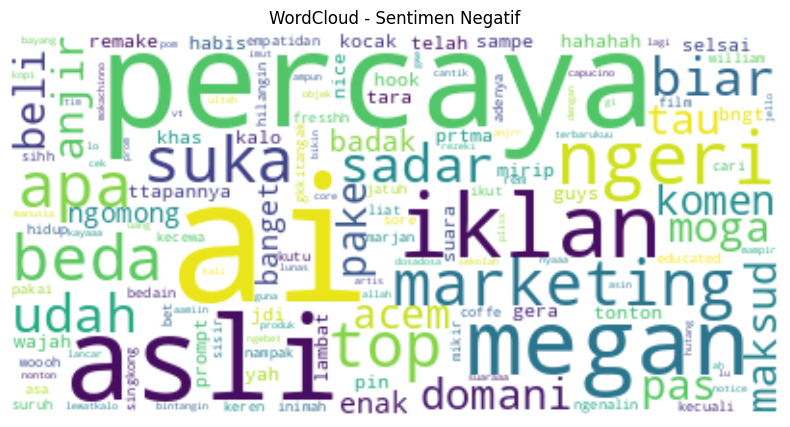

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Negatif
negatif = ' '.join(negatif_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negatif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Negatif")
plt.show()

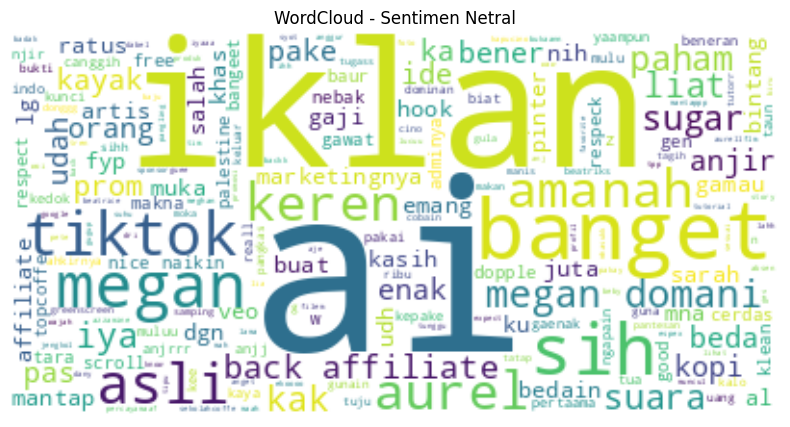

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Netral
netral = ' '.join(netral_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(netral)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Netral")
plt.show()

# **Prediksi Data Baru II**

## **Load Data**

In [ ]:
file_path = ("/content/drive/MyDrive/Project Portofolio/Sentiment Analysis VEO3/data test2.xlsx")
datad = pd.read_excel(file_path)
datad

,avatarThumbnail,cid,createTime,createTimeISO,detailedMentions/0/nickName,detailedMentions/0/profileUrl,detailedMentions/0/secUid,detailedMentions/0/userId,detailedMentions/1/nickName,detailedMentions/1/profileUrl,...,mentions/5,mentions/6,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7509027014651069192,1748331603,2025-05-27T07:40:03.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,15.0,https://www.tiktok.com/@rumusdesain/video/7508...,Kok gue nonton ini gelisah ya,6993991721643361282,anggarizkik,https://www.tiktok.com/@rumusdesain/video/7508...
1,https://p16-common-sign-va.tiktokcdn-us.com/to...,7509152701566829320,1748360863,2025-05-27T15:47:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,6.0,https://www.tiktok.com/@rumusdesain/video/7508...,tetap ada efek uncanny valley ga si?,6883307287747806209,leluhurbatman,https://www.tiktok.com/@rumusdesain/video/7508...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7509037842330436372,1748334127,2025-05-27T08:22:07.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,17.0,https://www.tiktok.com/@rumusdesain/video/7508...,baru awal aja Udah begini..apalagi nanti nih s...,7118024348439921691,adara.fredellaulani,https://www.tiktok.com/@rumusdesain/video/7508...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7508995323827880712,1748324224,2025-05-27T05:37:04.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@rumusdesain/video/7508...,"tahukah kalian bahwa Ronaldo, Lionel Messi, Ne...",7486038079770903559,tatang5211,https://www.tiktok.com/@rumusdesain/video/7508...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7511233111788225288,1748845247,2025-06-02T06:20:47.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@rumusdesain/video/7508...,Gada emosi yg tersampaikan,192709648448282624,fadliyahuzma,https://www.tiktok.com/@rumusdesain/video/7508...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7509144563920864008,1748358968,2025-05-27T15:16:08.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,7.509124e+18,NaN,https://www.tiktok.com/@rumusdesain/video/7508...,NaN,7093930809187435547,rumusdesain,https://www.tiktok.com/@rumusdesain/video/7508...
223,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7509082845018260242,1748344876,2025-05-27T11:21:16.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@rumusdesain/video/7508...,buseettt ngeri banget,6769842395393590273,dahlahh.males,https://www.tiktok.com/@rumusdesain/video/7508...
224,https://p16-common-sign-va.tiktokcdn-us.com/to...,7509371357181330196,1748411777,2025-05-28T05:56:17.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@rumusdesain/video/7508...,Ngeri,6803740733302014977,heyougrl,https://www.tiktok.com/@rumusdesain/video/7508...
225,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7509424935980368647,1748424251,2025-05-28T09:24:11.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,0.0,https://www.tiktok.com/@rumusdesain/video/7508...,jd yg belum nikah jgn beranak pinak krn besok2...,6785078467064841217,kepoduonggg,https://www.tiktok.com/@rumusdesain/video/7508...


In [ ]:
ds = datad[["text"]]
ds.head()

,text
0,Kok gue nonton ini gelisah ya
1,tetap ada efek uncanny valley ga si?
2,baru awal aja Udah begini..apalagi nanti nih s...
3,"tahukah kalian bahwa Ronaldo, Lionel Messi, Ne..."
4,Gada emosi yg tersampaikan


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    189 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


## **Pre Processing Data**

In [ ]:
ds.isnull().sum()

,0
text,38


In [ ]:
ds = ds.dropna()
ds.isnull().sum()

,0
text,0


In [ ]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string, re

# Unduh dulu stopwords jika belum
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Jangan gunakan nama `stopwords` untuk variabel
indonesian_stopwords = set(stopwords.words('indonesian'))

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Hapus stopwords
    text = [word for word in text.split() if word not in indonesian_stopwords]

    # Stemming
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)
# Terapkan ke kolom
ds["text"] = ds["text"].apply(clean)

In [ ]:
singkatan = {'dll', 'dsb', 'dr', 'stlh', 'blm', 'krn', 'tlg', 'tp', 'yg', 'krn', 'gmw', 'jg', 'gk', 'yh', 'ajh', 'wapresny',
             'diualng', 'bgt', 'worksssss', 'tpi', 'bjir', 'jirrr', 'prchaan', 'bbrp', 'klo', 'mrk', 'pdhal', 'wktu',
             'woakwow', 'wkwkwk', 'gk', 'ush', 'gue', 'ga', 'ngga', 'tp', 'ko', 'pa', 'gua', 'gak', 'jgn', 'nya', 'ya', 'si',
             'gw', 'jd', 'org', 'deh', 'aja', 'tuh', 'lgsg', 'knp', 'ap', 'tu', 'kek', 'loll', 'chek', 'nemu', 'slebeww', 'ohhh',
             'guyys', 'bgt', 'kk', 'ngk', 'jir', 'woy', 'loh', 'ea', 'oh', 'knal','kerennn', 'dijadiin', 'kmrn', 'slsai', 'hahaha',
             'ni', 'minn', 'ttep', 'jirr', 'sa', 'ge', 'sih', 'kyk', 'cm', 'de', 'pas', 'gin', 'jo', 'kalo'}
ds.loc[:, 'text'] = ds['text'].apply(lambda kalimat: ' '.join([kata for kata in kalimat.split() if kata not in singkatan]))

In [ ]:
ds['text'] = ds['text'].fillna('').astype(str)

print('HASIL TOKENISASI')
token = ds['text'].apply(lambda x: x.split())
print(token)

HASIL TOKENISASI
0                                      [nonton, gelisah]
1                                [efek, uncanny, valley]
2      [udah, beginiapalagi, nih, kembang, apa, orang...
3      [tahu, ronaldo, lionel, messi, neymar, junior,...
4                                          [gada, emosi]
                             ...                        
221    [video, ai, dalem, hati, ngomong, bisaaaa, man...
223                            [buseettt, ngeri, banget]
224                                              [ngeri]
225    [nikah, anak, pinak, susah, loker, dunia, isi,...
226                                          [gitu, rem]
Name: text, Length: 189, dtype: object


In [ ]:
#menghapus kata tidak bermakna seperti a, i, and, dan sebagainya
stop_words = set(stopwords.words('english'))
token = token.apply(lambda x: [word for word in x if word not in stop_words])
token

,text
0,"[nonton, gelisah]"
1,"[efek, uncanny, valley]"
2,"[udah, beginiapalagi, nih, kembang, apa, orang..."
3,"[tahu, ronaldo, lionel, messi, neymar, junior,..."
4,"[gada, emosi]"
...,...
221,"[video, ai, dalem, hati, ngomong, bisaaaa, man..."
223,"[buseettt, ngeri, banget]"
224,[ngeri]
225,"[nikah, anak, pinak, susah, loker, dunia, isi,..."


In [ ]:
x_new2 = vectorizer.transform(ds['text'])  # hasil bentuk sparse matrix

## **Prediksi**

In [ ]:
pred2 = model_nb.predict(x_new2)
pred2

array([0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
y_pred_labels2 = le.inverse_transform(pred2)
ds['predicted_sentiment'] = y_pred_labels2

## **Visualisasi**

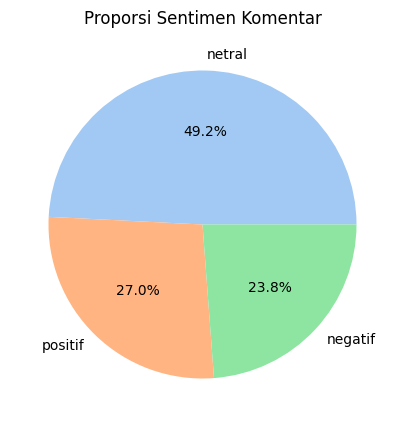

In [ ]:
sentimen_counts = ds['predicted_sentiment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proporsi Sentimen Komentar')
plt.show()

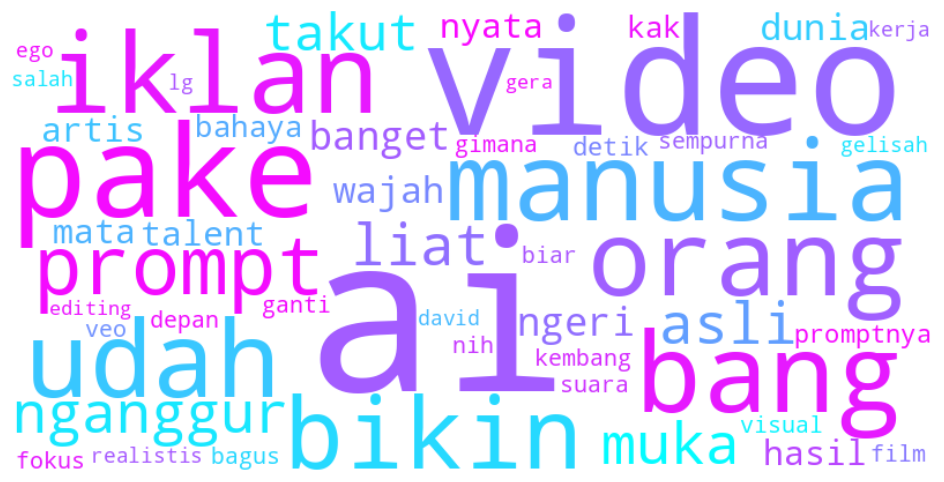

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Pastikan kolom "Hashtags" bertipe string
ds["text"] = ds["text"].astype(str)

# Pisahkan setiap hashtag menjadi daftar individu
hashtags_list = ds["text"].str.split().explode()

# Hitung frekuensi hashtag
hashtag_counts = Counter(hashtags_list)

# Buat Word Cloud berdasarkan frekuensi hashtag
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="cool",
                      prefer_horizontal=1, max_words=50).generate_from_frequencies(hashtag_counts)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hilangkan sumbu
plt.show()

In [ ]:
# WordCloud dari hasil prediksi model
positif_texts = ds[ds['predicted_sentiment'] == 'positif']['text']
negatif_texts = ds[ds['predicted_sentiment'] == 'negatif']['text']
netral_texts  = ds[ds['predicted_sentiment'] == 'netral']['text']

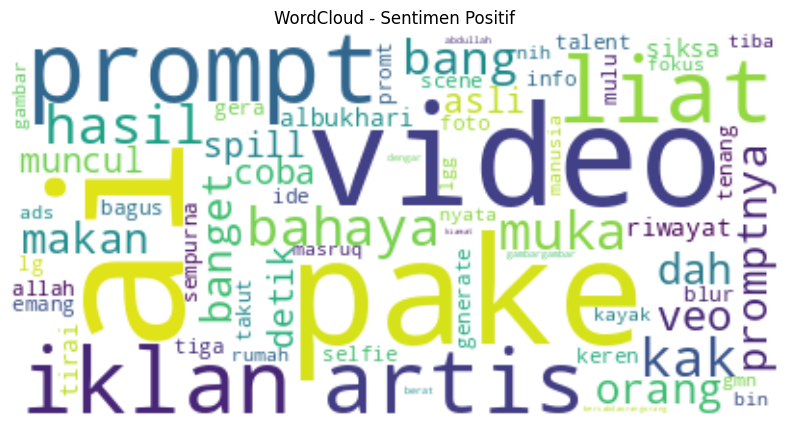

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positif
positif = ' '.join(netral_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Positif")
plt.show()

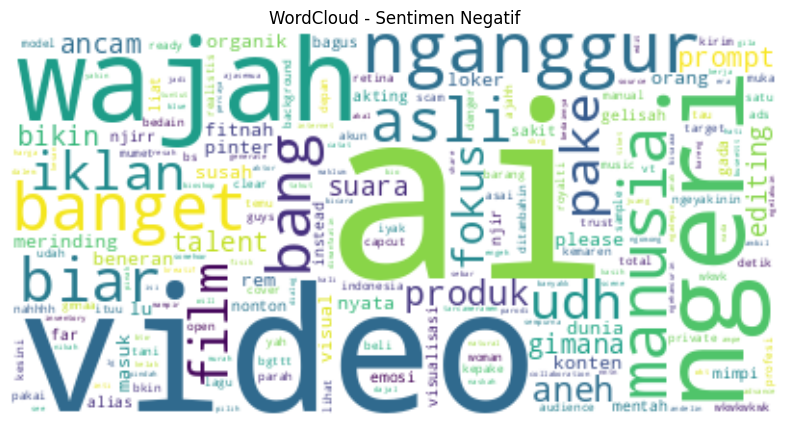

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Negatif
negatif = ' '.join(negatif_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negatif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Negatif")
plt.show()

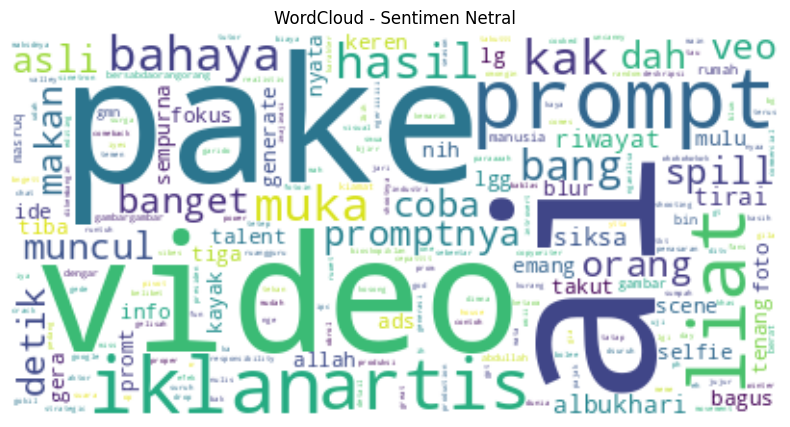

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Netral
netral = ' '.join(netral_texts)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white").generate(netral)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Sentimen Positif")
plt.show()